In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
test_images_cpy = test_images.copy()
print('shapes', train_images.shape, train_labels.shape, test_images.shape)

shapes (60000, 28, 28) (60000,) (10000, 28, 28)


In [3]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((-1, 28, 28, 1))
test_images = test_images.astype('float32')/255
print(test_images.shape)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

(10000, 28, 28, 1)


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 82us/sample - loss: 0.2707 - acc: 0.9146 - val_loss: 0.0644 - val_acc: 0.9813
Epoch 2/10
48000/48000 [==============================] - 3s 60us/sample - loss: 0.0618 - acc: 0.9803 - val_loss: 0.0613 - val_acc: 0.9818
Epoch 3/10
48000/48000 [==============================] - 3s 61us/sample - loss: 0.0413 - acc: 0.9868 - val_loss: 0.0420 - val_acc: 0.9878
Epoch 4/10
48000/48000 [==============================] - 3s 61us/sample - loss: 0.0300 - acc: 0.9901 - val_loss: 0.0386 - val_acc: 0.9893
Epoch 5/10
48000/48000 [==============================] - 3s 61us/sample - loss: 0.0233 - acc: 0.9927 - val_loss: 0.0381 - val_acc: 0.9890
Epoch 6/10
48000/48000 [==============================] - 3s 61us/sample - loss: 0.0187 - acc: 0.9940 - val_loss: 0.0446 - val_acc: 0.9877
Epoch 7/10
48000/48000 [==============================] - 3s 61us/sample - loss: 0.0146 - acc: 0.9956 - val_loss: 0.

In [6]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 89us/sample - loss: 0.0400 - acc: 0.9914


[0.040014331207416626, 0.9914]

In [9]:
predictions = model.predict(test_images)

predicted_classes = np.argmax(predictions, axis = 1)
true_classes = np.argmax(test_labels, axis = 1)
mask = predicted_classes != true_classes

miscl = test_images_cpy[mask]
predicted = predicted_classes[mask]
true = true_classes[mask]

In [11]:
print("Number of misclassified samples:", miscl.shape[0])

Number of misclassified samples: 86


Predicted class: 9 True class: 4


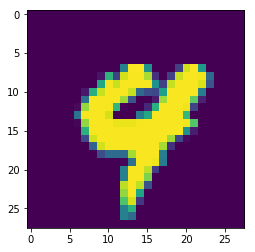

Predicted class: 4 True class: 8


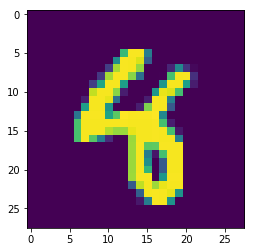

Predicted class: 5 True class: 0


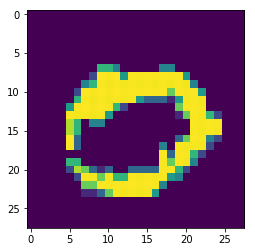

Predicted class: 7 True class: 4


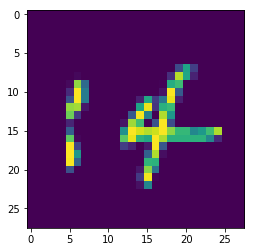

Predicted class: 3 True class: 5


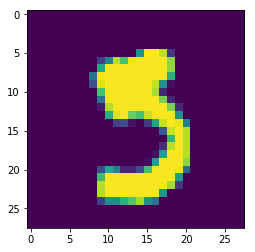

Predicted class: 9 True class: 5


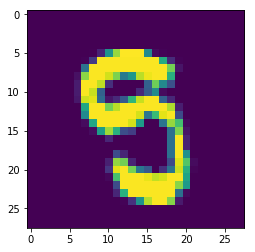

Predicted class: 7 True class: 0


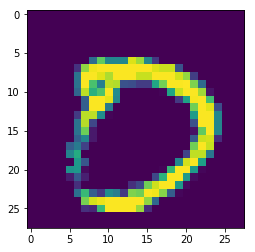

Predicted class: 1 True class: 7


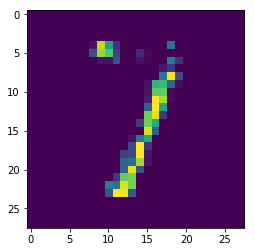

Predicted class: 7 True class: 0


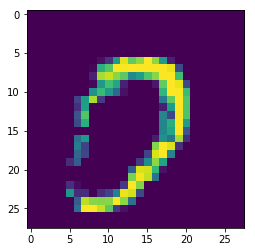

Predicted class: 2 True class: 8


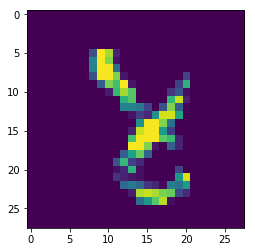

Predicted class: 8 True class: 0


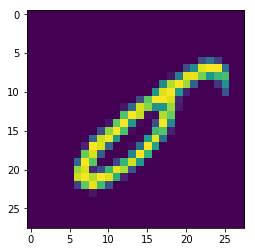

Predicted class: 6 True class: 1


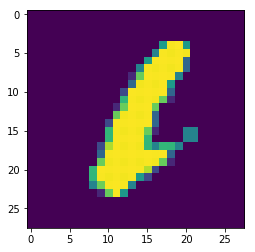

Predicted class: 9 True class: 4


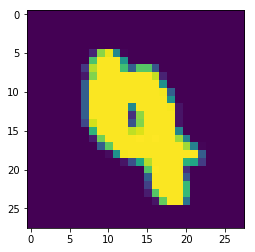

Predicted class: 2 True class: 7


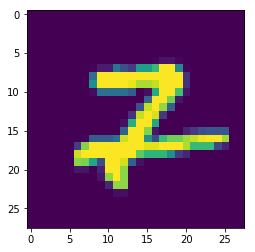

Predicted class: 1 True class: 0


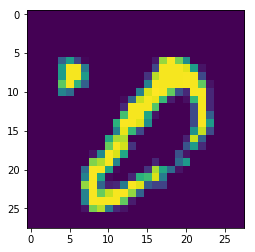

Predicted class: 7 True class: 9


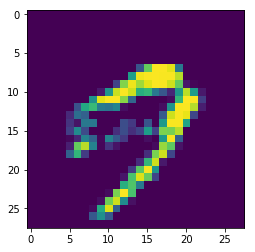

Predicted class: 7 True class: 2


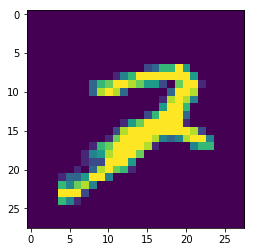

Predicted class: 7 True class: 9


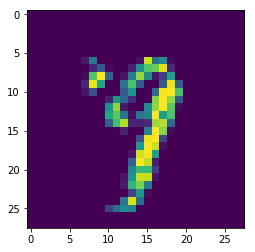

Predicted class: 6 True class: 5


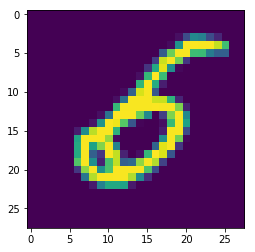

Predicted class: 7 True class: 2


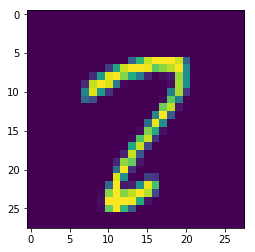

In [12]:
for i in list(range(miscl.shape[0]))[-20:]:
    print('Predicted class:', predicted[i], 'True class:', true[i])
    plt.imshow(miscl[i], cmap='viridis')#.reshape((28, 28, 1))
    plt.show()